<ipython-input-1-a3f7b90ffb34>:44: RuntimeWarning: divide by zero encountered in true_divide
  D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
<ipython-input-1-a3f7b90ffb34>:44: RuntimeWarning: invalid value encountered in double_scalars
  D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
<ipython-input-1-a3f7b90ffb34>:49: RuntimeWarning: divide by zero encountered in true_divide
  dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
<ipython-input-1-a3f7b90ffb34>:50: RuntimeWarning: divide by zero encountered in true_divide
  db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept
<ipython-input-1-a3f7b90ffb34>:54: RuntimeWarning: divide by zero encountered in true_divide
  N = sum(((y-b-m*x)/dy)**2)


Text(0.05, 0.8, 'Goodness of fit = INF')

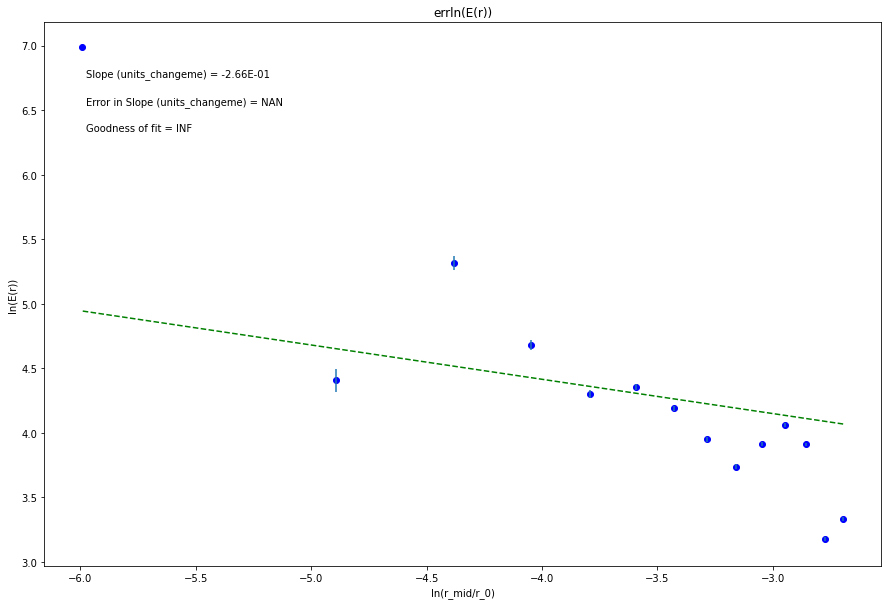

In [1]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
%matplotlib inline
#Import packages and libraries needed and give them shortcut names
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
lnr_midr = np.array([-2.695627681,-2.772588722,-2.855970331,-2.946942109,-3.047025568,-3.158251203,-3.283414346,-3.42651519,-3.593569274,-3.79423997,-4.045554398,-4.382026635,-4.892852258,-5.991464547]) #what are units?
lnEr = np.array([3.33220451,3.17805383,3.912023005,4.060443011,3.912023005,3.737669618,3.951243719,4.189654742,4.356708827,4.304065093,4.682131227,5.318119994,4.406719247,6.988413182]) #what are units?


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
errlnEr = np.array([0.01449712347,0.01637673589,0.01354096349,0.01434164059,0.01601067908,0.01813242656,0.01969182839,0.02211362798,0.02577945477,0.0313340952,0.03977238469,0.05506720982,0.09028019241,0])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = lnr_midr   #this should be the array you want to plot on the x axis
y = lnEr
dy = errlnEr  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('ln(r_mid/r_0)')
plt.ylabel('ln(E(r))')
plt.title('errln(E(r))')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (units_changeme) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (units_changeme) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')
